In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with credit card dataset for simple econometric analysis. This dataset was originally published alongside the 5th edition of William Greene's book Econometric Analysis. The classification goal is to predict if the application for credit card will accept (1/0) a credit card (variable y).

This dataset provides the applicant information. It includes 101,503 records and 12 fields.

In [2]:
data = pd.read_csv('Credit_Scoring.csv', header=0)
print(data.shape)
print(list(data.columns))

(101503, 12)
['ID', 'Delinquency', 'RUOUL', 'Age', 'NOT30-59DPDNW', 'DebtRatio', 'MonthlyIncome', 'LoansNumber', 'NOT90DL', 'NRELOL', 'NOT60-89DPDNW', 'DependentsNumber']


In [3]:
data.head()

,ID,Delinquency,RUOUL,Age,NOT30-59DPDNW,DebtRatio,MonthlyIncome,LoansNumber,NOT90DL,NRELOL,NOT60-89DPDNW,DependentsNumber
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
ID                  101503 non-null int64
Delinquency         101503 non-null int64
RUOUL               101503 non-null float64
Age                 101503 non-null int64
NOT30-59DPDNW       101503 non-null int64
DebtRatio           101503 non-null float64
MonthlyIncome       81403 non-null float64
LoansNumber         101503 non-null int64
NOT90DL             101503 non-null int64
NRELOL              101503 non-null int64
NOT60-89DPDNW       101503 non-null int64
DependentsNumber    98846 non-null float64
dtypes: float64(4), int64(8)
memory usage: 9.3 MB


In [5]:
data = data.fillna(data.mean())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
ID                  101503 non-null int64
Delinquency         101503 non-null int64
RUOUL               101503 non-null float64
Age                 101503 non-null int64
NOT30-59DPDNW       101503 non-null int64
DebtRatio           101503 non-null float64
MonthlyIncome       101503 non-null float64
LoansNumber         101503 non-null int64
NOT90DL             101503 non-null int64
NRELOL              101503 non-null int64
NOT60-89DPDNW       101503 non-null int64
DependentsNumber    101503 non-null float64
dtypes: float64(4), int64(8)
memory usage: 9.3 MB


#### Input variables

1 - ID: id number of borrower (numeric)

2 - RUOUL: Total balance on credit cards and personal lines of credit except real estate and no installment debt (numeric)

3 - Age: Age of borrower in years (numeric)

4 - NOT30-59DPDNW: Number of times borrower has been 30-59 days past due but no worse in the last 2 years (numeric)

5 - DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income (numeric)

6 - MonthlyIncome: Monthly Income (numeric)

7 - LoansNumber: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (numeric)

8 - NOT90DL: Number of times borrower has been 90 days or more past due (numeric)

9 - NRELOL: Number of mortgage and real estate loans including home equity lines of credit (numeric)

10 - NOT60-89DPDNW: Number of times borrower has been 60-89 days past due but no worse in the last 2 years (numeric)

11 - DependentsNumber: Number of dependents in family excluding themselves (spouse, children etc.) (numeric)


#### Predict variable (desired target):

SeriousDelinquency: 1 if Person experienced 90 days past due delinquency or worse, 0 if rent

### Data exploration

In [7]:
data['Delinquency'].value_counts()

0    94732
1     6771
Name: Delinquency, dtype: int64

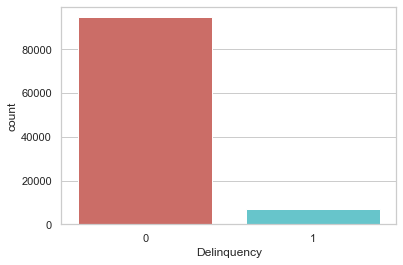

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='Delinquency',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 94732 no's and 671 yes's in the Delinquency variables.

# Visualizations

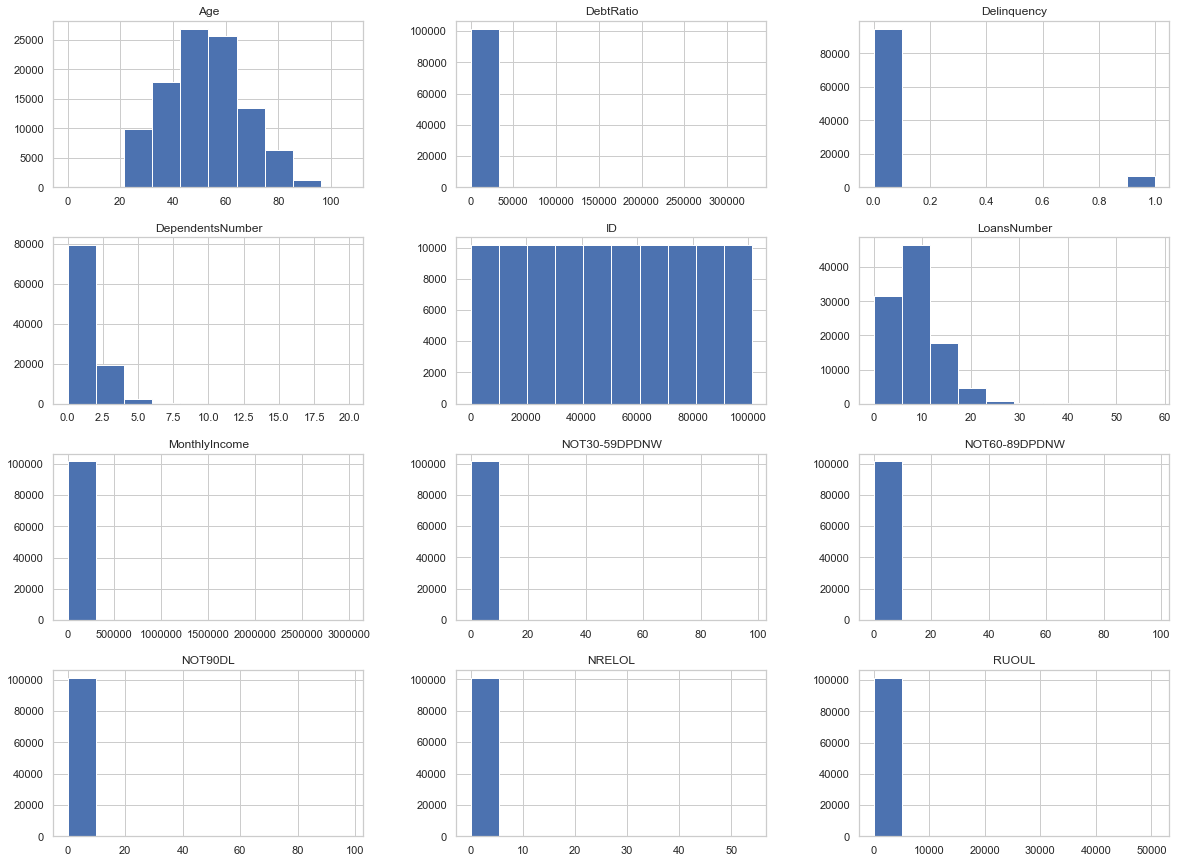

In [9]:
num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.savefig("data_histogram_plots")
plt.show()

In [10]:
data_final=data
data_final.columns.values

array(['ID', 'Delinquency', 'RUOUL', 'Age', 'NOT30-59DPDNW', 'DebtRatio',
       'MonthlyIncome', 'LoansNumber', 'NOT90DL', 'NRELOL',
       'NOT60-89DPDNW', 'DependentsNumber'], dtype=object)

In [11]:
data_final.drop(['ID'], axis=1, inplace=True)

In [12]:
X = data_final.loc[:, data_final.columns != 'Delinquency']
y = data_final.loc[:, data_final.columns == 'Delinquency']
y=y.astype('int')

In [13]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1 = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Delinquency'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no delinquency in oversampled data",len(os_data_y[os_data_y['Delinquency']==0]))
print("Number of delinquency",len(os_data_y[os_data_y['Delinquency']==1]))
print("Proportion of no delinquency data in oversampled data is ",len(os_data_y[os_data_y['Delinquency']==0])/len(os_data_X))
print("Proportion of delinquency data in oversampled data is ",len(os_data_y[os_data_y['Delinquency']==1])/len(os_data_X))

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

length of oversampled data is  132716
Number of no delinquency in oversampled data 66358
Number of delinquency 66358
Proportion of no delinquency data in oversampled data is  0.5
Proportion of delinquency data in oversampled data is  0.5


### Recursive Feature Elimination

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
sf_X2 = pd.DataFrame({
    'Feature': os_data_X.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,RUOUL,1
1,Age,1
2,NOT30-59DPDNW,1
3,DebtRatio,1
4,MonthlyIncome,1
5,LoansNumber,1
6,NOT90DL,1
7,NRELOL,1
8,NOT60-89DPDNW,1
9,DependentsNumber,1


In [16]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['RUOUL', 'Age', 'NOT30-59DPDNW', 'DebtRatio', 'MonthlyIncome', 'LoansNumber', 'NOT90DL', 'NRELOL', 'NOT60-89DPDNW', 'DependentsNumber']
10


The Recursive Feature Elimination (RFE) has helped us select the following features: 'RUOUL', 'Age', 'NOT30-59DPDNW', 'DebtRatio', 'MonthlyIncome', 'LoansNumber', 'NOT90DL', 'NRELOL', 'NOT60-89DPDNW', 'DependentsNumber'

In [17]:
X=os_data_X[cols]
y=os_data_y['Delinquency']

### Implementing the model

In [18]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.640486
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.076      
Dependent Variable: Delinquency      AIC:              170025.4228
Date:               2020-05-29 17:02 BIC:              170123.3824
No. Observations:   132716           Log-Likelihood:   -85003.    
Df Model:           9                LL-Null:          -91992.    
Df Residuals:       132706           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
RUOUL             -0.0001   0.0000  -2.2322 0.0256 -0.0002 -0.0000
Age               -0.0093   0.0002 -39.7421 0.0000 -0

### Random Forest Classifier Model Fitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and caculating the accuracy

In [20]:
y_pred = rf.predict(X_test)

In [21]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.92


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     19798
           1       0.92      0.91      0.92     20017

    accuracy                           0.92     39815
   macro avg       0.92      0.92      0.92     39815
weighted avg       0.92      0.92      0.92     39815



In [23]:
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of random forest classifier model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, we got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of random forest classifier model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, we can\n say, when a model makes a prediction, how often it is correct. In our prediction case, when our\n random forest classifier model predicted an applicant is going to accept a credit card, that\n applicant actually accepted", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")
#calculate Recall
print("\nRecall of random forest classifier model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is an applicant who accepted a credit card present in the test set and our random\n forest classifier model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of random forest classifier model: 91.62%
Well, we got a classification rate of 91.62%

Precision of random forest classifier model: 91.96%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, we can
 say, when a model makes a prediction, how often it is correct. In our prediction case, when our
 random forest classifier model predicted an applicant is going to accept a credit card, that
 applicant actually accepted 91.96% of the time.

Recall of random forest classifier model: 91.30%
Recall: If there is an applicant who accepted a credit card present in the test set and our random
 forest classifier model can identify it 91.30% of the time.


### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18201  1597]
 [ 1741 18276]]


In [25]:
print("The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  36477 correct predictions.
The result is telling us that we have:  3338 incorrect predictions.
We have a total predictions of:  39815


### ROC Curves

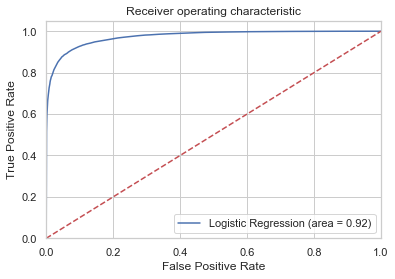

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Real time Prediction

In [27]:
data['Prob_to_Approval'] = rf.predict_proba(data[X_train.columns])[:,1]
data[['Prob_to_Approval']].head(10)

,Prob_to_Approval
0,0.96
1,0.11
2,0.23
3,0.11
4,0.26
5,0.02
6,0.17
7,0.13
8,0.01
9,0.24


In [28]:
data.to_csv('Prob_to_Approval.csv', encoding='utf-8')